<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Decision-Tree-Iris-Dataset/blob/main/Prediction_Using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR:- KSHITEZ PRATAP SINGH**


# **DECISION TREE CLASSIFICATION**

### **Description**  
A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

During training, the Decision Tree algorithm selects the best attribute to split the data based on a metric such as entropy or Gini impurity, which measures the level of impurity or randomness in the subsets. The goal is to find the attribute that maximizes the information gain or the reduction in impurity after the split.
![picture](https://drive.google.com/uc?export=view&id=1n0qGaCjObQprapr1jqJV4N55jYYobq4i)

### **Importing the Essential Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.datasets import load_iris
import sklearn.datasets as data

### **Importing the Dataset and identifying the independent and dependent variable**

In [2]:
iris_data=load_iris()
dataset=pd.DataFrame(iris_data.data)

print('Features Name : ', iris_data.feature_names)
print('\n')
print('target Name : ',iris_data.target_names)
print('\n')

#Printing the dataset shape
print('Dataset Length : ',len(dataset))
print('\n')
print('Dataset Shape : ',dataset.shape)

#Shape:150 sample (row) and 4 features (columns)
#Printing the dataset obseravtions

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


target Name :  ['setosa' 'versicolor' 'virginica']


Dataset Length :  150


Dataset Shape :  (150, 4)


In [3]:
dataset.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print(dataset)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


### **Retrieving Features or Independent Variables**

In [6]:
x=dataset.values[:,0:4]
print('Independent Variable :','\n',x)

Independent Variable : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 

### **Retrieving Dependent Variables**

In [7]:
y=iris_data.target
print('Dependent Variable :','\n',y)

Dependent Variable : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### **Spliting the dataset into tarining and testing dataset**

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
print('x_train : ','\n', x_train)
print('\n')

x_train :  
 [[7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.  1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [6.7 3.3 5.7 2.1]
 [4.4 3.  1.3 0.2]
 [6.  2.7 5.1 1.6]
 [6.4 2.7 5.3 1.9]
 [5.9 3.  5.1 1.8]
 [5.2 3.5 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.8 2.7 4.1 1. ]
 [4.9 3.1 1.5 0.1]
 [7.4 2.8 6.1 1.9]
 [6.2 2.9 4.3 1.3]
 [7.6 3.  6.6 2.1]
 [6.7 3.  5.2 2.3]
 [6.3 2.3 4.4 1.3]

In [10]:
print('x_test : ','\n',x_test)
print('\n')

x_test :  
 [[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.  5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.  3.5 1.3 0.3]
 [7.2 3.2 6.  1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.  1.9]
 [6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]]




In [11]:
print('y_train : ','\n',y_train)
print('\n')

y_train :  
 [2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0
 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2 2 0 0 1 0 2 0 2
 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1 2 0]




In [12]:
print('y_test : ','\n',y_test)

y_test :  
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


### **ASM Entropy**

In [13]:
clf_entropy=DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

### **Prediction**

In [14]:
y_pred2=clf_entropy.predict(x_test)
print('Predicted Values: ')
print(y_pred2)

Predicted Values: 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


### **Confusion Matrix**

In [15]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred2))
print('\n')

#for row it is True Negative
#for columns it is False Positive

Confusion Matrix: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]




### **Accuracy**

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test,y_pred2)*100,"%")
print('\n')

Accuracy :  95.55555555555556 %




### **Classification Report**

In [17]:
from sklearn.metrics import classification_report
print('Report : \n', classification_report(y_test,y_pred2))

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [18]:
# Prediction on random data using clf_entropy
# We will input random values(4 feature values) and make prediction
# The output is [2] means verginica


xrandom=[[6.4,1.8,6.6,2.1]]
y_pred4=clf_entropy.predict(xrandom)
print(y_pred4)

[2]


### **Visualising**

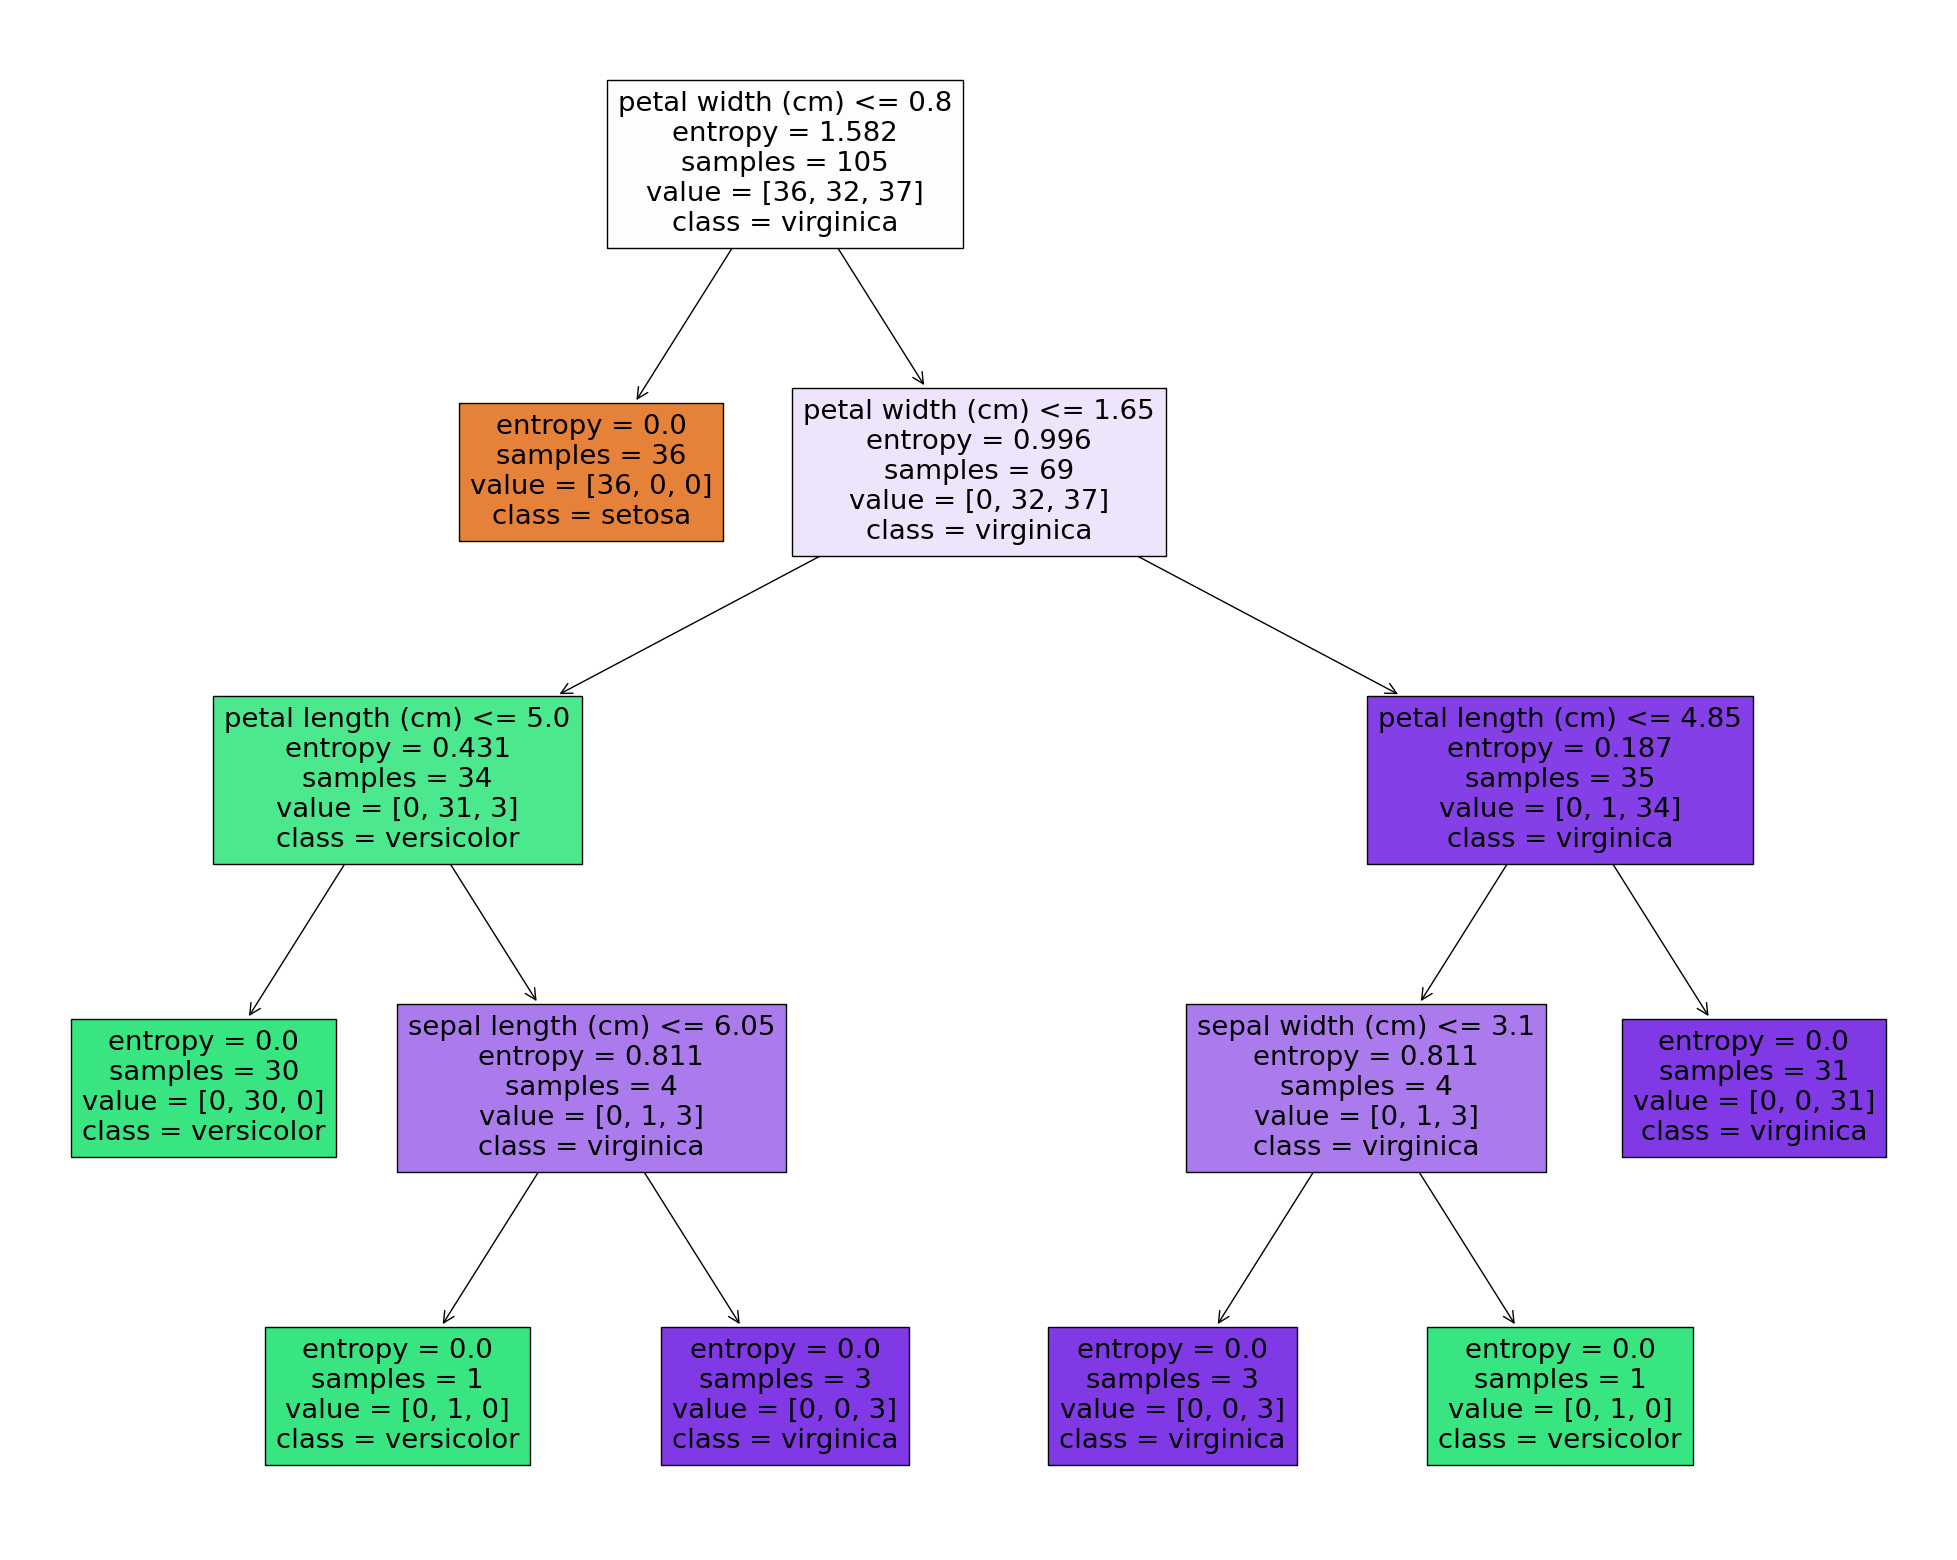

In [19]:
# this data is for training

fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(clf_entropy, feature_names=iris_data.feature_names,class_names=iris_data.target_names,filled=True)

### **Bagging**

In [20]:
#important it will come

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=5)

#Fitting the model
tree=tree.fit(x_train,y_train)

bag=BaggingClassifier(base_estimator=tree,n_estimators=500,random_state=5)
bag=bag.fit(x_train,y_train)

y_train_pred=bag.predict(x_train)
y_test_pred=bag.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
bag_test=round(accuracy_score(y_test,y_test_pred),2)*100
print(bag_test)

96.0
